# Sintesis Data dengan Library synthcity
Lakukan sintesis data dengan library synthcity dengan plugin Bayesian Network, sintesis berjumlah 500 sampel

## Data loading

### Subtask:
Load the dataset "data_terbaru.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "data_terbaru.csv" into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('data_terbaru.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data_terbaru.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'data_terbaru.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,GRUP,BPMJ,BPMP,SPOJ,SPOP,SUHUJ,SUHUP
0,0,48,35,71,74,32.81,35.50
1,0,52,40,31,46,33.50,34.00
2,0,70,63,50,77,35.43,36.06
3,0,69,51,70,84,34.81,35.43
4,0,56,52,81,83,34.43,34.68


(100, 7)


## Data preparation

### Subtask:
Prepare the loaded data for synthetic data generation using the synthcity library.


**Reasoning**:
Handle missing values, encode categorical features, validate data types, and create a copy of the modified DataFrame.



In [ ]:
# Check for missing values
print(df.isnull().sum())

# No missing values found in the provided head, so no imputation or removal is needed.

# Identify categorical features and apply one-hot encoding if necessary.
# Based on the provided head, 'GRUP' might be categorical.  Check unique values.
print(df['GRUP'].unique())

# If 'GRUP' has a limited number of unique values, it's categorical.  Let's assume it is.
# We'll use one-hot encoding.  If 'GRUP' contains more unique values, revise accordingly.

# One-hot encode 'GRUP'
df = pd.get_dummies(df, columns=['GRUP'], prefix=['GRUP'])

# Data Type Validation (ensure numerical columns are numeric)
for col in ['BPMJ', 'BPMP', 'SPOJ', 'SPOP', 'SUHUJ', 'SUHUP']:
    if not pd.api.types.is_numeric_dtype(df[col]):
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Column '{col}' converted to numeric.")
        except Exception as e:
            print(f"Error converting '{col}' to numeric: {e}")


# Create a copy of the modified DataFrame
df_prepared = df.copy()

display(df_prepared.head())

GRUP     0
BPMJ     0
BPMP     0
SPOJ     0
SPOP     0
SUHUJ    0
SUHUP    0
dtype: int64
[0 1]


,BPMJ,BPMP,SPOJ,SPOP,SUHUJ,SUHUP,GRUP_0,GRUP_1
0,48,35,71,74,32.81,35.50,True,False
1,52,40,31,46,33.50,34.00,True,False
2,70,63,50,77,35.43,36.06,True,False
3,69,51,70,84,34.81,35.43,True,False
4,56,52,81,83,34.43,34.68,True,False


## Model training

### Subtask:
Train a Bayesian Network model using the synthcity library on the prepared data.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/data_terbaru.csv")

In [ ]:
df.describe()

,KODE,GRUP,BPMJ,BPMP,SPOJ,SPOP,SUHUJ,SUHUP
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,39.420000,0.500000,64.900000,62.300000,81.800000,69.980000,35.356500,35.882100
std,22.577892,0.502519,17.493722,20.132641,17.314092,18.704496,1.110196,0.870458
min,0.000000,0.000000,27.000000,26.000000,31.000000,14.000000,32.810000,33.680000
25%,21.750000,0.000000,52.750000,48.750000,73.750000,57.500000,34.620000,35.365000
50%,40.500000,0.500000,64.000000,63.000000,85.000000,75.000000,35.400000,35.930000
75%,58.000000,1.000000,77.250000,75.000000,92.000000,83.250000,36.092500,36.422500
max,79.000000,1.000000,113.000000,122.000000,174.000000,105.000000,37.750000,37.810000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KODE    100 non-null    int64  
 1   GRUP    100 non-null    int64  
 2   BPMJ    100 non-null    int64  
 3   BPMP    100 non-null    int64  
 4   SPOJ    100 non-null    int64  
 5   SPOP    100 non-null    int64  
 6   SUHUJ   100 non-null    float64
 7   SUHUP   100 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 6.4 KB


In [ ]:
df.columns

Index(['KODE', 'GRUP', 'BPMJ', 'BPMP', 'SPOJ', 'SPOP', 'SUHUJ', 'SUHUP'], dtype='object')

In [ ]:
from synthcity.plugins import Plugins
Plugins(categories=["generic", "privacy"]).list()

[2025-04-08T11:52:04.802075+0000][2805][CRITICAL] module disabled: /usr/local/lib/python3.11/dist-packages/synthcity/plugins/generic/plugin_goggle.py


['pategan',
 'decaf',
 'great',
 'ddpm',
 'dpgan',
 'adsgan',
 'privbayes',
 'tvae',
 'bayesian_network',
 'aim',
 'rtvae',
 'arf',
 'ctgan',
 'nflow']

In [ ]:
syn_model = Plugins().get("pategan")
syn_model.fit(df)

[2025-04-08T11:52:07.352933+0000][2805][CRITICAL] module disabled: /usr/local/lib/python3.11/dist-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 10/10 [00:00<00:00, 12.36it/s]


In [ ]:
print(synthetic_data)

     KODE  GRUP  BPMJ  BPMP  SPOJ  SPOP      SUHUJ      SUHUP
0      75     0    82    60    81    85  35.988910  34.549410
1      49     1    78    74    87    46  37.535706  36.346024
2      46     0    81    71    62    96  36.339062  37.810000
3      57     1    87    37    88    77  36.400514  34.983274
4      55     1    91    59    75    33  37.750000  36.239475
5      69     1    96    45    84    68  36.755619  36.108310
6      28     0    98    26    75    82  37.164153  36.316342
7      40     1    69    38    39    52  35.231697  37.266090
8      51     0    78    40    86    74  34.458482  35.394269
9      20     1    89    56    34    91  35.274144  37.744235
10     57     0    94    61   106    88  35.313563  34.339197
11     38     0    47    91   100    64  35.748320  34.924412
12     76     0    84    36    64    56  37.707186  34.429237
13     24     1    81    77    75    91  35.354305  37.789962
14     34     1    99    60    31    87  36.205929  36.879184
15     3

## Model  Evaluation

### KS Test

In [ ]:
# Periksa statistik deskriptif dari data asli
print("Statistik Data Asli:")
print(df.describe())

# Periksa statistik deskriptif dari data sintetis
print("\nStatistik Data Sintetis:")
synthetic_df = synthetic_data.dataframe()
print(synthetic_df.describe())

Statistik Data Asli:
             KODE        GRUP        BPMJ        BPMP        SPOJ        SPOP  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    39.420000    0.500000   64.900000   62.300000   81.800000   69.980000   
std     22.577892    0.502519   17.493722   20.132641   17.314092   18.704496   
min      0.000000    0.000000   27.000000   26.000000   31.000000   14.000000   
25%     21.750000    0.000000   52.750000   48.750000   73.750000   57.500000   
50%     40.500000    0.500000   64.000000   63.000000   85.000000   75.000000   
75%     58.000000    1.000000   77.250000   75.000000   92.000000   83.250000   
max     79.000000    1.000000  113.000000  122.000000  174.000000  105.000000   

            SUHUJ       SUHUP  
count  100.000000  100.000000  
mean    35.356500   35.882100  
std      1.110196    0.870458  
min     32.810000   33.680000  
25%     34.620000   35.365000  
50%     35.400000   35.930000  
75%     36.092500   36.42

In [ ]:
df_asli = pd.DataFrame(df)
df_sintesis = pd.DataFrame(synthetic_df)

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp

# Membuat DataFrame
df_asli = pd.DataFrame(df)
df_sintesis = pd.DataFrame(synthetic_df)

# Melakukan uji Kolmogorov-Smirnov untuk setiap kolom
ks_results = {col: ks_2samp(df_asli[col], df_sintesis[col]) for col in df.keys()}

ks_results

{'KODE': KstestResult(statistic=0.23, pvalue=0.0002503716555522677, statistic_location=40, statistic_sign=1),
 'GRUP': KstestResult(statistic=0.006, pvalue=1.0, statistic_location=0, statistic_sign=-1),
 'BPMJ': KstestResult(statistic=0.566, pvalue=2.467571813725868e-25, statistic_location=79, statistic_sign=1),
 'BPMP': KstestResult(statistic=0.192, pvalue=0.0038369748542590085, statistic_location=49, statistic_sign=-1),
 'SPOJ': KstestResult(statistic=0.346, pvalue=2.4162452987440573e-09, statistic_location=79, statistic_sign=-1),
 'SPOP': KstestResult(statistic=0.108, pvalue=0.2724966677507765, statistic_location=86, statistic_sign=1),
 'SUHUJ': KstestResult(statistic=0.482, pvalue=3.98756214722495e-18, statistic_location=36.25, statistic_sign=1),
 'SUHUP': KstestResult(statistic=0.268, pvalue=9.79835834861779e-06, statistic_location=36.81, statistic_sign=1)}

In [ ]:
from synthcity.utils.serialization import load, load_from_file, save, save_to_file
buff = save(syn_model)
type(buff)

bytes

In [ ]:
reloaded = load(buff)
reloaded.name()

'pategan'

In [ ]:
df_sintesis.to_csv('sampel500_pategan.csv', index=True)

In [ ]:
from synthcity.plugins.core.dataloader import DataLoader

from synthcity.plugins.core.models.tabular_gan import TabularGAN

from synthcity.plugins.core.dataloader import GenericDataLoader

In [ ]:
generic_loader = GenericDataLoader(df)

In [ ]:
torch_dataloader = load(buff)

In [ ]:
from synthcity.plugins.core.dataloader import GenericDataLoader
from synthcity.benchmark import Benchmarks
import pprint

# Bungkus data asli dan sintetis
real_loader = GenericDataLoader(df, target_column=None)
synthetic_loader = GenericDataLoader(synthetic_df, target_column=None)

# Tes dan metrik
tests = [("custom_generator", "synthetic", synthetic_loader)]  # custom_generator = nama plugin bebas
metrics = {
    "statistical": {},
    "privacy": {}
}

from synthcity.benchmark import Benchmarks

results = Benchmarks.evaluate(
    tests=[("marginal_distributions", "marginal_distributions", {})],
    X=real_loader,  # ini data asli
    synthetic=synthetic_loader,
    synthetic_size=500,
    repeats=1
)


# Tampilkan hasil
pprint.pprint(results)


{'marginal_distributions':                                                         min       max  \
sanity.data_mismatch.score                         0.000000  0.000000   
sanity.common_rows_proportion.score                0.000000  0.000000   
sanity.nearest_syn_neighbor_distance.mean          0.417713  0.417713   
sanity.close_values_probability.score              0.150000  0.150000   
sanity.distant_values_probability.score            0.050000  0.050000   
stats.jensenshannon_dist.marginal                  0.039248  0.039248   
stats.chi_squared_test.marginal                    0.094144  0.094144   
stats.inv_kl_divergence.marginal                   0.292115  0.292115   
stats.ks_test.marginal                             0.637500  0.637500   
stats.max_mean_discrepancy.joint                   0.100000  0.100000   
stats.wasserstein_dist.joint                       0.667204  0.667204   
stats.prdc.precision                               0.650000  0.650000   
stats.prdc.recall       

### Corelattion Matrix

Mengukur hubungan linier antar variabel numerik. Kita bandingkan korelasi antar kolom di data asli vs sintetis. Jika beda jauh → struktur hubungan rusak.

* Di dalam data sintetis itu sendiri (apakah masuk akal dan konsisten), dan

* Antara data sintetis dan data asli (apakah pola-pola hubungan antarkolom tetap terjaga).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_real = pd.read_csv("data_terbaru.csv")
df_synth = pd.read_csv("/content/sampel500_pategan.csv")

# Hitung korelasi
corr_real = df_real.corr(numeric_only=True)
corr_synth = df_synth.corr(numeric_only=True)

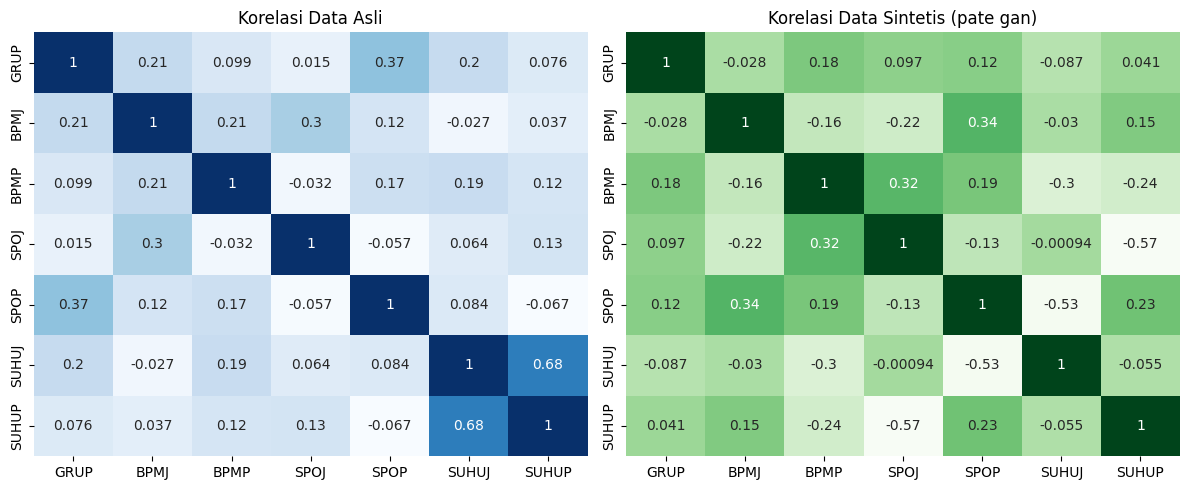

In [ ]:
# Plot perbandingan korelasi
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(corr_real, ax=axs[0], annot=True, cmap="Blues", cbar=False)
axs[0].set_title("Korelasi Data Asli")

sns.heatmap(corr_synth, ax=axs[1], annot=True, cmap="Greens", cbar=False)
axs[1].set_title("Korelasi Data Sintetis (pate gan)")

plt.tight_layout()
plt.show()

### PCA (Principal Component Analysis)

Mengurangi dimensi & memvisualisasikan data. Jika pola distribusi komponen utama berbeda antara asli dan sintetis → struktur data berbeda.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Reload data
df_real = pd.read_csv("data_terbaru.csv")
df_synth = pd.read_csv("/content/sampel500_pategan.csv")

In [ ]:
# Ambil hanya kolom numerik dan drop NaN jika ada
df_real_num = df_real.select_dtypes(include=['float64', 'int64']).dropna()
df_synth_num = df_synth.select_dtypes(include=['float64', 'int64']).dropna()

# Standarisasi data sebelum PCA
scaler = StandardScaler()
real_scaled = scaler.fit_transform(df_real_num)
synth_scaled = scaler.transform(df_synth_num)

In [ ]:
# PCA - Ambil 2 komponen utama
pca = PCA(n_components=2)
real_pca = pca.fit_transform(real_scaled)
synth_pca = pca.transform(synth_scaled)

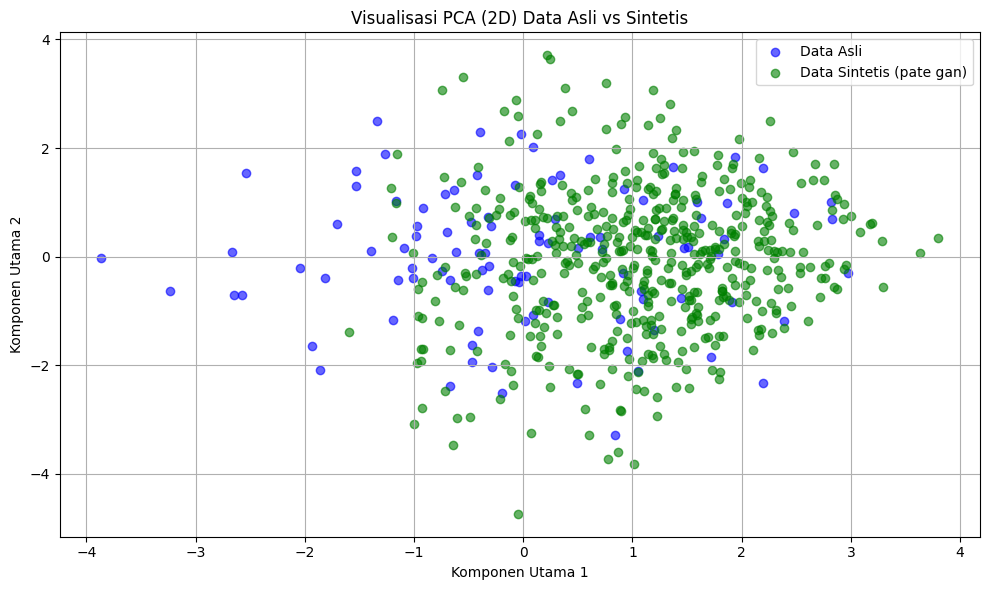

In [ ]:
# Plotting hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], alpha=0.6, label='Data Asli', color='blue')
plt.scatter(synth_pca[:, 0], synth_pca[:, 1], alpha=0.6, label='Data Sintetis (pate gan)', color='green')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Visualisasi PCA (2D) Data Asli vs Sintetis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### TSTR (Train on Synthetic, Test on Real)

Hasil data augmentasi dijadikan data training sedangkan data asli jadi data testing.

🧠 Tujuan Uji Ini: Kita ingin tahu apakah data sintetik (hasil augmentasi) cukup berkualitas untuk melatih model yang tetap akurat saat diuji di data asli.

Dengan begitu, kamu bisa percaya bahwa data hasil augmentasi ini benar-benar punya "nilai fungsional".



#### RF

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df_real = pd.read_csv("/content/data_terbaru.csv")
df_pategan = pd.read_csv("/content/sampel500_pategan.csv")

In [ ]:
df_real.shape[0]  # Menampilkan jumlah baris

100

In [ ]:
df_pategan.shape[0]

500

In [ ]:
def get_X_y(df):
    X = df.drop(columns=["GRUP"])
    y = df["GRUP"]
    return X, y

X_real, y_real = get_X_y(df_real)
X_pategan, y_pategan = get_X_y(df_pategan)

In [ ]:
# 🤖 Model: Train di Bayesian, Test di Data Asli
# ======================
model_pategan = RandomForestClassifier(random_state=42)
model_pategan.fit(X_pategan, y_pategan)

# Drop 'Unnamed: 0' before fitting
X_pategan = X_pategan.drop(columns=['Unnamed: 0'], errors='ignore')
# errors='ignore' prevents error if the column doesn't exist

model_pategan.fit(X_pategan, y_pategan)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_pategan = model_pategan.predict(X_real)
print("📊 Performance (Train on pategan → Test on REAL):")
print(classification_report(y_real, y_pred_pategan))

📊 Performance (Train on pategan → Test on REAL):
              precision    recall  f1-score   support

           0       0.57      0.26      0.36        50
           1       0.52      0.80      0.63        50

    accuracy                           0.53       100
   macro avg       0.54      0.53      0.49       100
weighted avg       0.54      0.53      0.49       100



##### HYPERPARAMETER TUNING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model dasar
model_rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter
grid_space = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3]  # ← fix: tidak boleh 1
}

In [ ]:
# Grid Search dengan cross-validation 3-fold
grid = GridSearchCV(
    model_rf,
    param_grid=grid_space,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
# Lakukan tuning: train di data sintetik pategan
grid.fit(X_pategan, y_pategan)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Gunakan model terbaik untuk prediksi di data asli
best_model = grid.best_estimator_
y_pred = best_model.predict(X_real)

In [ ]:
# Tampilkan hasil evaluasi
print("📈 Best Params:", grid.best_params_)
print("\n📊 Evaluation (After Tuning):")
print(classification_report(y_real, y_pred))

📈 Best Params: {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}

📊 Evaluation (After Tuning):
              precision    recall  f1-score   support

           0       0.50      0.16      0.24        50
           1       0.50      0.84      0.63        50

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.43       100
weighted avg       0.50      0.50      0.43       100



#### LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
# Fungsi bantu tetap sama
def get_X_y(df):
    X = df.drop(columns=["GRUP"])
    y = df["GRUP"]
    return X, y

In [ ]:
# Ambil data training & testing
X_real, y_real = get_X_y(df_real)
X_pategan, y_pategan = get_X_y(df_pategan)

# Bersihkan kolom jika ada 'Unnamed: 0'
X_pategan = X_pategan.drop(columns=['Unnamed: 0'], errors='ignore')
X_real = X_real.drop(columns=['Unnamed: 0'], errors='ignore')

In [ ]:
# Inisialisasi model Logistic Regression
model_logreg = LogisticRegression(max_iter=1000, solver='liblinear')  # solver untuk dataset kecil

# Train model di data sintetik (Bayesian)
model_logreg.fit(X_pategan, y_pategan)

# Uji model di data asli
y_pred_logreg = model_logreg.predict(X_real)

In [ ]:
# Tampilkan hasil evaluasi
print("📊 Performance (Logistic Regression — Train on pategan → Test on REAL):")
print(classification_report(y_real, y_pred_logreg))

📊 Performance (Logistic Regression — Train on pategan → Test on REAL):
              precision    recall  f1-score   support

           0       0.70      0.14      0.23        50
           1       0.52      0.94      0.67        50

    accuracy                           0.54       100
   macro avg       0.61      0.54      0.45       100
weighted avg       0.61      0.54      0.45       100



**HYPERPARAMETER TUNING**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Bersihkan jika ada kolom tambahan
X_pategan = X_pategan.drop(columns=['Unnamed: 0'], errors='ignore')
X_real = X_real.drop(columns=['Unnamed: 0'], errors='ignore')

# Definisikan model dasar
logreg = LogisticRegression()

# Parameter grid untuk tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear support l1 & l2
    'max_iter': [100, 300, 1000]
}

# Inisialisasi GridSearch
grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
# 🚀 Tuning dengan data sintetik
grid.fit(X_pategan, y_pategan)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 300, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
# Prediksi di data asli
best_logreg = grid.best_estimator_
y_pred_tuned = best_logreg.predict(X_real)



In [ ]:
# Hasil akhir
print("📌 Best Params:", grid.best_params_)
print("\n📊 Performance (Logistic Regression TUNED — Train on pategan → Test on REAL):")
print(classification_report(y_real, y_pred_tuned))

📌 Best Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

📊 Performance (Logistic Regression TUNED — Train on pategan → Test on REAL):
              precision    recall  f1-score   support

           0       0.54      0.14      0.22        50
           1       0.51      0.88      0.64        50

    accuracy                           0.51       100
   macro avg       0.52      0.51      0.43       100
weighted avg       0.52      0.51      0.43       100



#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Fungsi bantu
def get_X_y(df):
    X = df.drop(columns=["GRUP"])
    y = df["GRUP"]
    return X, y

# Ambil data training & testing
X_real, y_real = get_X_y(df_real)
X_pategan, y_pategan = get_X_y(df_pategan)

In [ ]:
# Bersihkan kolom 'Unnamed: 0' jika ada
X_pategan = X_pategan.drop(columns=['Unnamed: 0'], errors='ignore')
X_real = X_real.drop(columns=['Unnamed: 0'], errors='ignore')

# Inisialisasi model SVM
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)



In [ ]:
# 🚀 Train model di data sintetik (Bayesian)
model_svm.fit(X_pategan, y_pategan)

# 🧪 Test model di data asli
y_pred_svm = model_svm.predict(X_real)

# 📊 Tampilkan hasil evaluasi
print("📊 Performance (SVM — Train on pategan → Test on REAL):")
print(classification_report(y_real, y_pred_svm))

📊 Performance (SVM — Train on pategan → Test on REAL):
              precision    recall  f1-score   support

           0       0.68      0.26      0.38        50
           1       0.54      0.88      0.67        50

    accuracy                           0.57       100
   macro avg       0.61      0.57      0.52       100
weighted avg       0.61      0.57      0.52       100



**HYPERPARAMETER TUNING**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Bersihkan kolom jika ada 'Unnamed: 0'
X_pategan = X_pategan.drop(columns=['Unnamed: 0'], errors='ignore')
X_real = X_real.drop(columns=['Unnamed: 0'], errors='ignore')

# Definisikan model dasar
svm = SVC()

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Setup GridSearch
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)



In [ ]:
# 🚀 Training model di data sintetik (Bayesian)
grid.fit(X_pategan, y_pategan)

# 🧪 Uji di data asli
best_svm = grid.best_estimator_
y_pred_tuned_svm = best_svm.predict(X_real)



Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
# 📝 Hasil
print("📌 Best Hyperparameters (SVM):", grid.best_params_)
print("\n📊 Performance (TUNED SVM — Train on pategan → Test on REAL):")
print(classification_report(y_real, y_pred_tuned_svm))


📌 Best Hyperparameters (SVM): {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

📊 Performance (TUNED SVM — Train on pategan → Test on REAL):
              precision    recall  f1-score   support

           0       0.69      0.22      0.33        50
           1       0.54      0.90      0.67        50

    accuracy                           0.56       100
   macro avg       0.61      0.56      0.50       100
weighted avg       0.61      0.56      0.50       100

